## PLAYER TRENDS <a id="player-trends"></a>

### General <a id="general_players"></a>

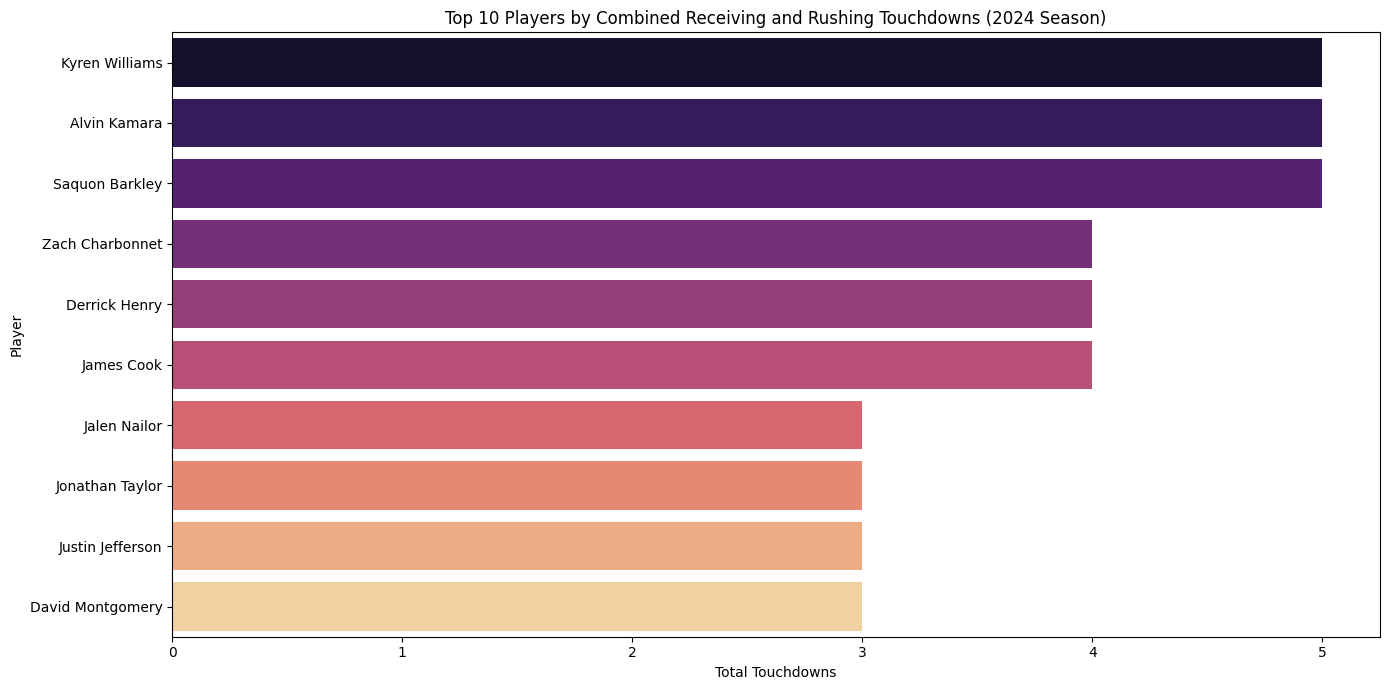

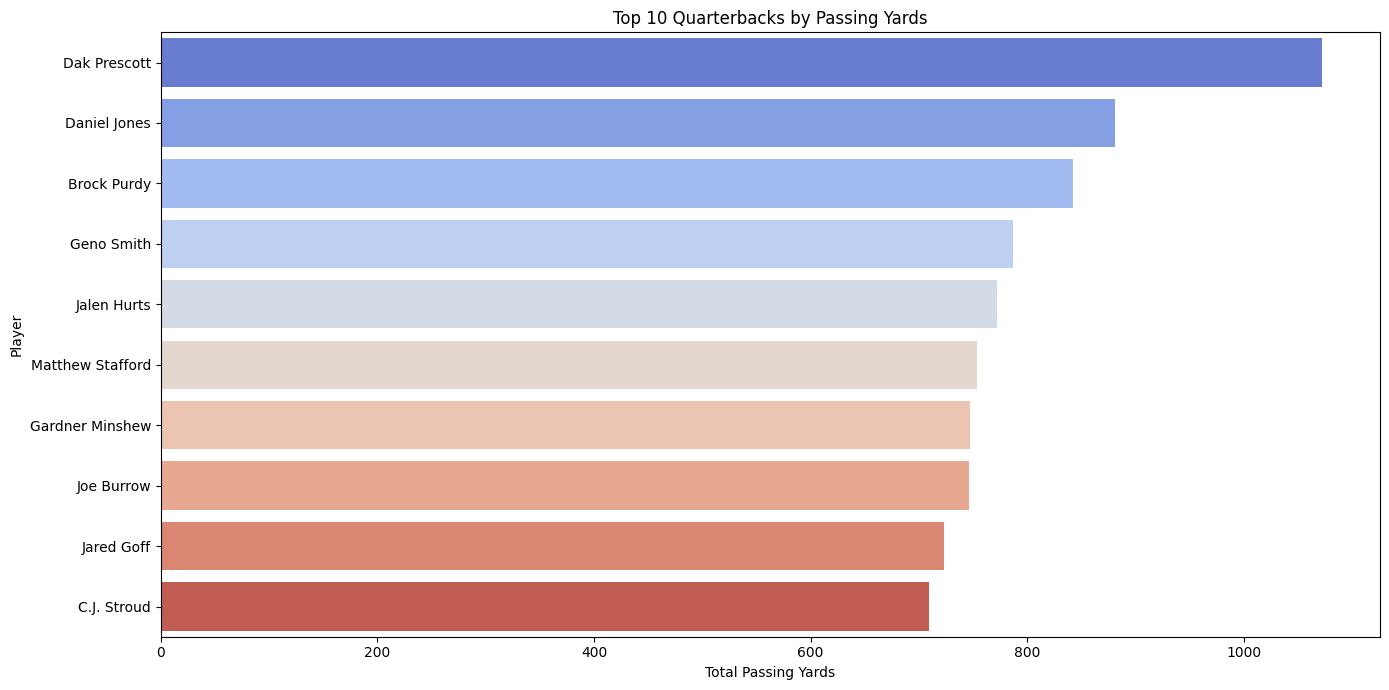

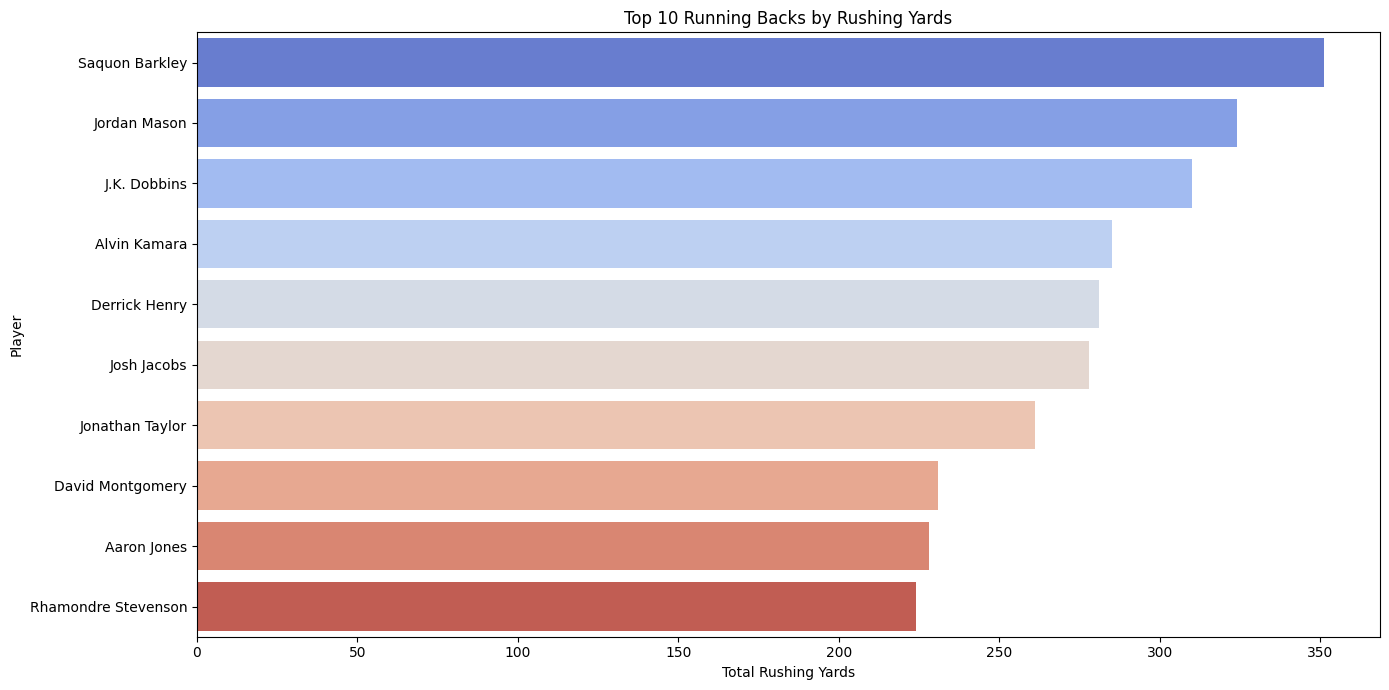

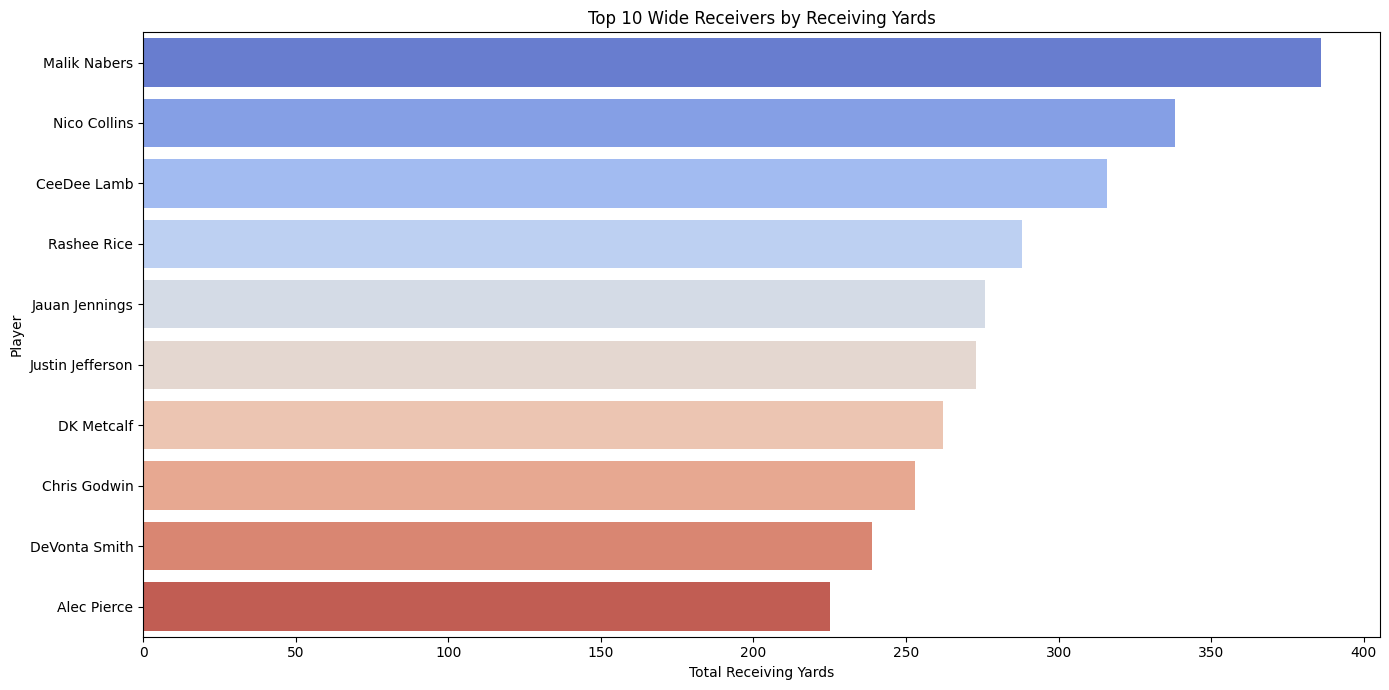

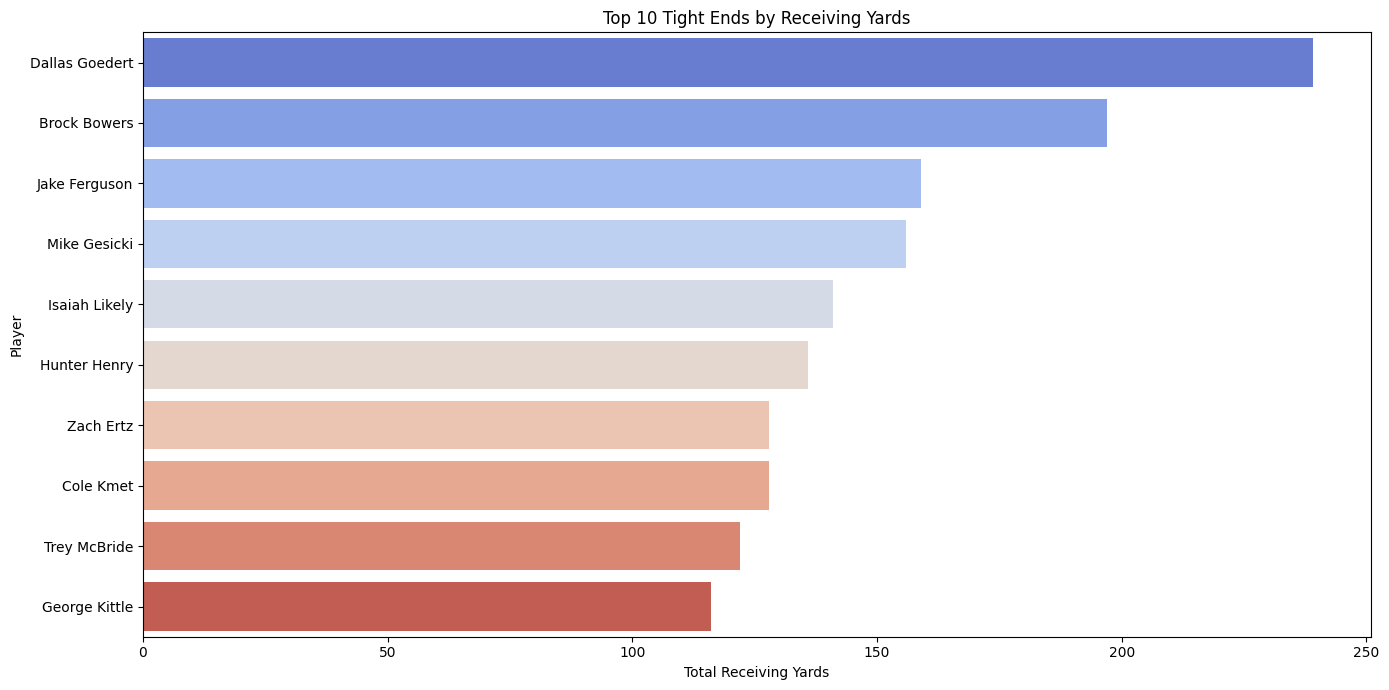

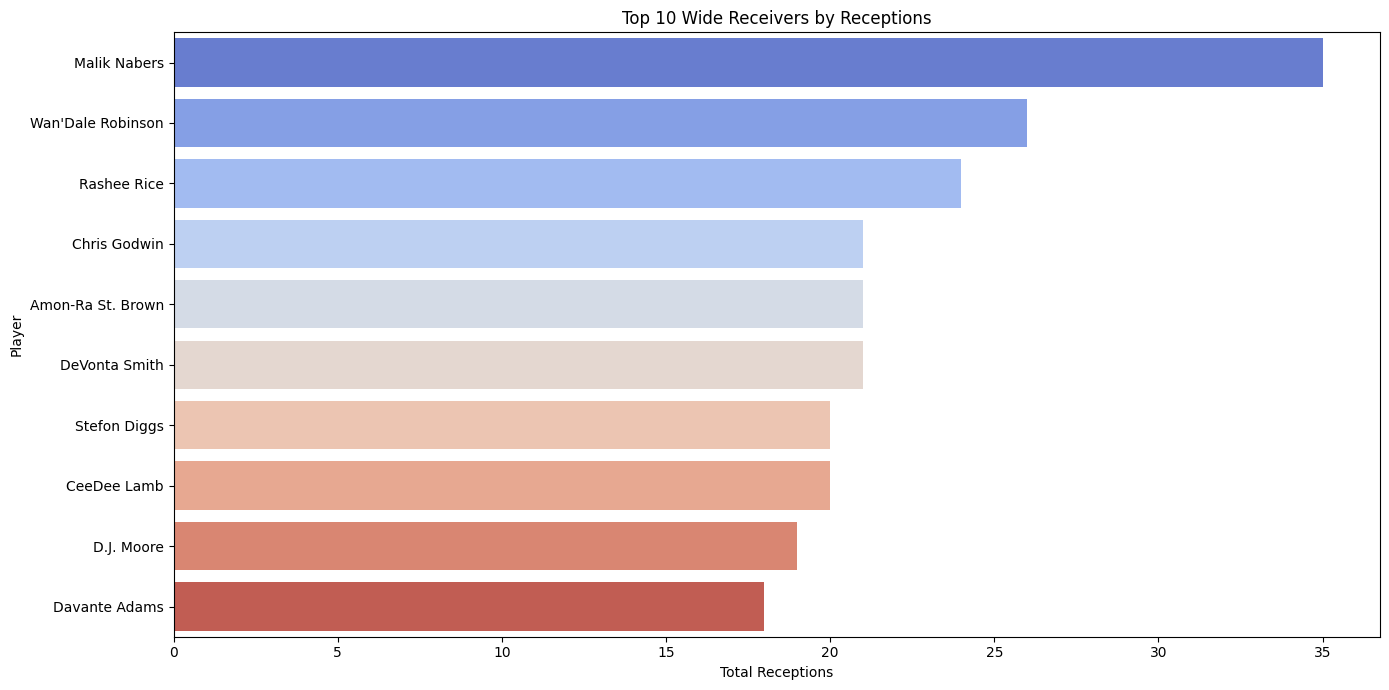

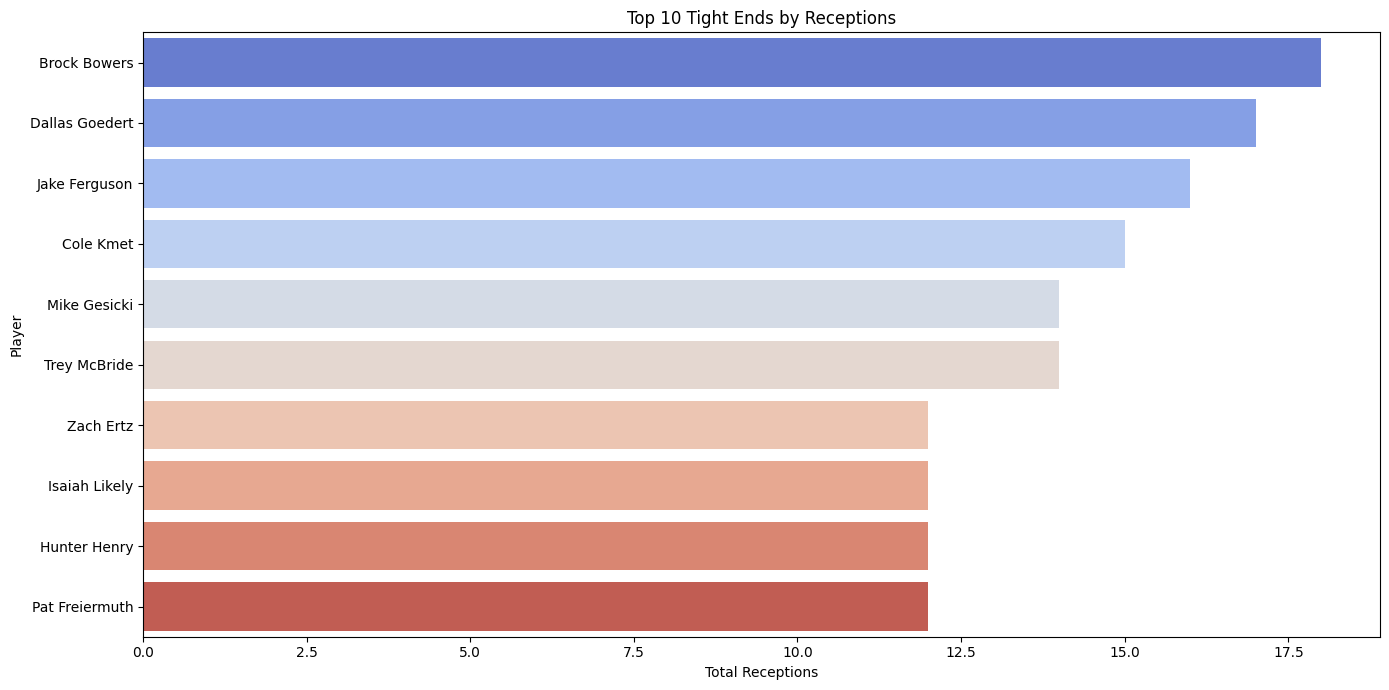

In [18]:
# Leaders

conn = sqlite3.connect('data/nfl.db')
cursor = conn.cursor()
teams_df = pd.read_sql_query("SELECT * FROM Teams", conn)
games_df = pd.read_sql_query("SELECT * FROM Games", conn) # ALL TIME
# games_df = pd.read_sql_query("SELECT * FROM Games WHERE season = 2024", conn) # ONLY 2024
# playerstats_df = pd.read_sql_query("SELECT * FROM PlayerStats", conn)
playerstats_df = pd.read_sql_query("SELECT * FROM PlayerStats WHERE season = 2024", conn) # ONLY 2024
conn.close()

# Top Players by Combined Receiving and Rushing Touchdowns
top_players_td = playerstats_df.groupby('player_display_name').agg({
    'receiving_tds': 'sum',
    'rushing_tds': 'sum'
}).reset_index()
top_players_td['total_tds'] = top_players_td['receiving_tds'] + top_players_td['rushing_tds']
top_players_td = top_players_td.sort_values(by='total_tds', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='total_tds', y='player_display_name', data=top_players_td, palette='magma', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Players by Combined Receiving and Rushing Touchdowns (2024 Season)')
plt.xlabel('Total Touchdowns')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

# Top Quarterbacks Performance
top_qbs = playerstats_df[playerstats_df['position'] == 'QB'].groupby('player_display_name').agg({
    'passing_yards': 'sum', 'passing_tds': 'sum'
}).sort_values(by='passing_yards', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='passing_yards', y='player_display_name', data=top_qbs, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Quarterbacks by Passing Yards')
plt.xlabel('Total Passing Yards')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('top_quarterbacks.png')
plt.show()

# Top Running Backs Performance
top_rbs = playerstats_df[playerstats_df['position'] == 'RB'].groupby('player_display_name').agg({
    'rushing_yards': 'sum', 'rushing_tds': 'sum'
}).sort_values(by='rushing_yards', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='rushing_yards', y='player_display_name', data=top_rbs, hue='player_display_name', dodge=False, palette='coolwarm', legend=False)
plt.title('Top 10 Running Backs by Rushing Yards')
plt.xlabel('Total Rushing Yards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

# Top Wide Receivers by Receiving Yards
top_wrs = playerstats_df[playerstats_df['position'] == 'WR'].groupby('player_display_name').agg({
    'receiving_yards': 'sum', 'receiving_tds': 'sum'
}).sort_values(by='receiving_yards', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='receiving_yards', y='player_display_name', data=top_wrs, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Wide Receivers by Receiving Yards')
plt.xlabel('Total Receiving Yards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

# Top Tight Ends by Receiving Yards
top_wrs = playerstats_df[playerstats_df['position'] == 'TE'].groupby('player_display_name').agg({
    'receiving_yards': 'sum', 'receiving_tds': 'sum'
}).sort_values(by='receiving_yards', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='receiving_yards', y='player_display_name', data=top_wrs, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Tight Ends by Receiving Yards')
plt.xlabel('Total Receiving Yards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

# Top Wide Receivers by Receptions
top_wrs_receptions = playerstats_df[playerstats_df['position'] == 'WR'].groupby('player_display_name').agg({
    'receptions': 'sum', 'receiving_tds': 'sum'
}).sort_values(by='receptions', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='receptions', y='player_display_name', data=top_wrs_receptions, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Wide Receivers by Receptions')
plt.xlabel('Total Receptions')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

# Top Tight Ends by Receptions
top_tes_receptions = playerstats_df[playerstats_df['position'] == 'TE'].groupby('player_display_name').agg({
    'receptions': 'sum', 'receiving_tds': 'sum'
}).sort_values(by='receptions', ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='receptions', y='player_display_name', data=top_tes_receptions, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Tight Ends by Receptions')
plt.xlabel('Total Receptions')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

### Quarterbacks <a id="quarterbacks"></a>

In [ ]:
# QB Rushing Touchdowns 

df_updated = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Filter the dataset for Baker Mayfield's entire career and focus on rushing touchdowns
baker_mayfield_rushing_career = df_updated[df_updated['player'] == 'Baker Mayfield']

# Sum the rushing touchdowns and get the detailed breakdown
baker_mayfield_rushing_td_career = baker_mayfield_rushing_career['rush_td'].sum()

# Get the details of games where he scored rushing touchdowns
baker_mayfield_rushing_career_details = baker_mayfield_rushing_career[baker_mayfield_rushing_career['rush_td'] > 0][['game_id', 'opponent_team', 'rush_td']]

# Extract the year and week from the game_id
baker_mayfield_rushing_career_details['Year'] = baker_mayfield_rushing_career_details['game_id'].str[:4]
baker_mayfield_rushing_career_details['Week'] = baker_mayfield_rushing_career_details['game_id'].str[5:7]

baker_mayfield_rushing_td_career, baker_mayfield_rushing_career_details


### Running Backs <a id="running-backs"></a>

### Wide Receivers <a id="wide-receivers"></a>

In [21]:
# Single WR Stats - Longest Reception & Matchup Stats

player_name = 'Tyreek Hill'
# player_name = 'Jaylen Waddle'
# player_name = 'Dawson Knox'
# player_name = 'Justin Jefferson'
opponent_team = 'SEA'

all_stats_df = pd.read_csv('data/all_passing_rushing_receiving.csv')

def get_player_longest_reception_stats(player_name, opponent_team=None):
    player_data = all_stats_df[all_stats_df['player'] == player_name]

    if 'rec_long' not in player_data.columns:
        return f"No reception data available for {player_name}"

    longest_reception = player_data['rec_long'].max()  # Career-longest reception
    total_games = player_data.shape[0]
    opponent_insights = None
    opponent_data = None
    if opponent_team:
        # Filter the data based on the specified opponent team
        opponent_data = player_data[player_data['opponent_team'] == opponent_team].drop_duplicates(subset=['game_id', 'rec_yds'])
        
        if opponent_data.empty:
            opponent_insights = f"No data available for {player_name} against {opponent_team}"
        else:
            opponent_insights = {
                "Opponent": opponent_team,
                "Longest Reception vs Opponent": opponent_data['rec_long'].max(),
                "Average Longest Reception vs Opponent": opponent_data['rec_long'].mean(),
                "Total Games vs Opponent": opponent_data.shape[0],
                "Games with 30+ Yard Reception vs Opponent": opponent_data[opponent_data['rec_long'] >= 30].shape[0],
                "Average Receptions per Game vs Opponent": opponent_data['rec'].mean(),
                "Average Receiving Yards per Game vs Opponent": opponent_data['rec_yds'].mean(),
                "Receiving Touchdowns vs Opponent": opponent_data['rec_td'].sum(),
                "Average Targets per Game vs Opponent": opponent_data['targets'].mean() if 'targets' in opponent_data.columns else "N/A",
            }

    else:
        opponent_insights = "No opponent provided."

    career_insights = {
        "Player": player_name,
        "Career Longest Reception": longest_reception,
        "Total Games Played": total_games,
    }

    return career_insights, opponent_insights, opponent_data

career_insights, opponent_insights, opponent_data = get_player_longest_reception_stats(player_name, opponent_team)

print("\nCAREER INSIGHTS:")
for key, value in career_insights.items():
    print(f"{key}: {value}")
print("\nOPPONENT INSIGHTS:")
if isinstance(opponent_insights, dict):
    for key, value in opponent_insights.items():
        print(f"{key}: {value}")
else:
    print(opponent_insights)
if opponent_data is not None:
    print("\nGAMES AGAINST OPPONENT:")
    for index, row in opponent_data.iterrows():
        print(f"{index + 1}. Game ID: {row['game_id']}, Rec Yards: {row['rec_yds']}")


CAREER INSIGHTS:
Player: Tyreek Hill
Career Longest Reception: 80.0
Total Games Played: 142

OPPONENT INSIGHTS:
Opponent: SEA
Longest Reception vs Opponent: 32.0
Average Longest Reception vs Opponent: 24.5
Total Games vs Opponent: 2
Games with 30+ Yard Reception vs Opponent: 1
Average Receptions per Game vs Opponent: 3.5
Average Receiving Yards per Game vs Opponent: 57.0
Receiving Touchdowns vs Opponent: 0.0
Average Targets per Game vs Opponent: 7.0

GAMES AGAINST OPPONENT:
22468. Game ID: 2024_03_MIA_SEA, Rec Yards: 40.0
27451. Game ID: 2018_16_KC_SEA, Rec Yards: 74.0


In [32]:
# Longest Reception in All Career Games

data = pd.read_csv('data/all_passing_rushing_receiving.csv')

player_name = 'CeeDee Lamb'
# player_name = 'Tyreek Hill'
# player_name = 'Jameson Williams'
# player_name = input("Enter the player's name: ")

def get_player_reception_stats(player_name):
    # Filter the dataset for the given player
    player_data = data[data['player'] == player_name]
    
    # Drop rows with missing rec_long values
    player_data = player_data[['game_id', 'rec_long']].dropna(subset=['rec_long'])
    
    # Group by game_id to avoid duplicates, and take the max rec_long for each game
    player_data = player_data.groupby('game_id').agg({'rec_long': 'max'}).reset_index()
    
    # Sort by game_id to ensure chronological order
    player_data = player_data.sort_values(by='game_id', ascending=False)
    
    # Print game_id and rec_long for each game
    print(f"Longest reception for {player_name} over career (in chronological order):")
    for index, row in player_data.iterrows():
        print(f"Game: {row['game_id']}, Longest Reception: {row['rec_long']}")
    
    # Calculate overall stats
    total_games = len(player_data)
    avg_rec_long = player_data['rec_long'].mean()
    max_rec_long = player_data['rec_long'].max()
    
    # Print overall stats
    print("\n--- Overall Stats ---")
    print(f"Total games: {total_games}")
    print(f"Average longest reception: {avg_rec_long:.2f}")
    print(f"Maximum longest reception: {max_rec_long}")

get_player_reception_stats(player_name)

Longest reception for CeeDee Lamb over career (in chronological order):
Game: 2024_03_BAL_DAL, Longest Reception: 31.0
Game: 2024_02_NO_DAL, Longest Reception: 65.0
Game: 2024_01_DAL_CLE, Longest Reception: 34.0
Game: 2023_19_GB_DAL, Longest Reception: 47.0
Game: 2023_18_DAL_WAS, Longest Reception: 15.0
Game: 2023_17_DET_DAL, Longest Reception: 92.0
Game: 2023_16_DAL_MIA, Longest Reception: 49.0
Game: 2023_15_DAL_BUF, Longest Reception: 16.0
Game: 2023_14_PHI_DAL, Longest Reception: 26.0
Game: 2023_13_SEA_DAL, Longest Reception: 23.0
Game: 2023_12_WAS_DAL, Longest Reception: 16.0
Game: 2023_11_DAL_CAR, Longest Reception: 10.0
Game: 2023_10_NYG_DAL, Longest Reception: 30.0
Game: 2023_09_DAL_PHI, Longest Reception: 29.0
Game: 2023_08_LA_DAL, Longest Reception: 26.0
Game: 2023_06_DAL_LAC, Longest Reception: 23.0
Game: 2023_05_DAL_SF, Longest Reception: 29.0
Game: 2023_04_NE_DAL, Longest Reception: 20.0
Game: 2023_03_DAL_ARI, Longest Reception: 32.0
Game: 2023_02_NYJ_DAL, Longest Reception

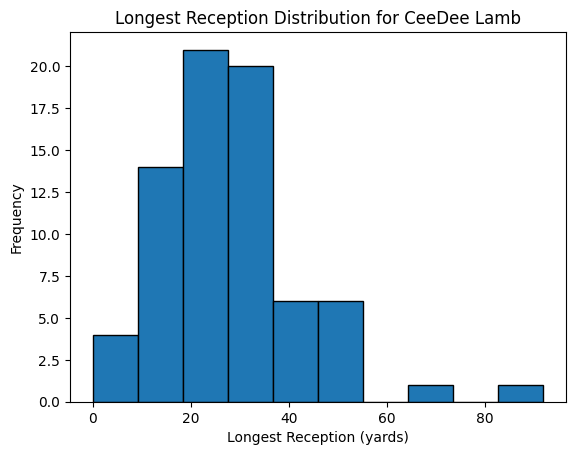

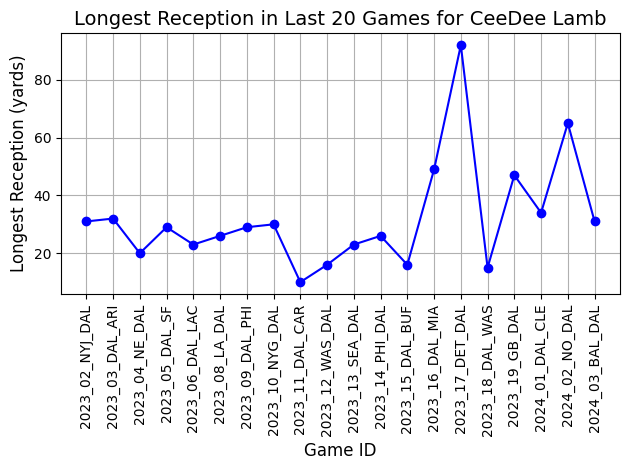

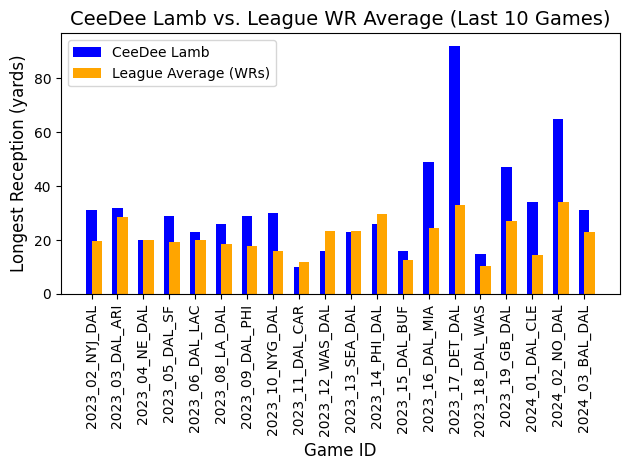

In [34]:
# Longest Reception Analysis

# 1. Distribution of Longest Receptions (Histogram)
def plot_reception_distribution(player_name):
    player_data = data[data['player'] == player_name].dropna(subset=['rec_long'])
    plt.hist(player_data['rec_long'], bins=10, edgecolor='black')
    plt.title(f'Longest Reception Distribution for {player_name}')
    plt.xlabel('Longest Reception (yards)')
    plt.ylabel('Frequency')
    plt.show()
plot_reception_distribution(player_name)

# 2. Longest Reception Over Time (Line Chart)
def plot_last_20_games_reception_trend(player_name):
    player_data = data[data['player'] == player_name].dropna(subset=['rec_long'])
    player_data = player_data.drop_duplicates(subset=['game_id']).sort_values(by='game_id', ascending=True)
    if len(player_data) > 20:
        player_data = player_data[-20:]
    plt.plot(player_data['game_id'], player_data['rec_long'], marker='o', color='blue', label=player_name)
    plt.title(f'Longest Reception in Last 20 Games for {player_name}', fontsize=14)
    plt.xlabel('Game ID', fontsize=12)
    plt.ylabel('Longest Reception (yards)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_last_20_games_reception_trend(player_name)

# 3. Double Bar Chart: Last 20 Games vs League Average
def plot_last_10_games_vs_league_avg(player_name):
    player_data = data[(data['player'] == player_name) & (data['rec'] > 0)].dropna(subset=['rec_long'])
    player_last_10 = player_data.drop_duplicates(subset=['game_id']).sort_values(by='game_id').tail(20)
    league_data = data[(data['position'] == 'WR') & (data['rec'] > 0) & (data['rec_long'].notna())]
    league_avg_per_game = league_data.groupby('game_id')['rec_long'].mean().reset_index()
    league_avg_last_10 = league_avg_per_game[league_avg_per_game['game_id'].isin(player_last_10['game_id'])]
    plt.bar(player_last_10['game_id'], player_last_10['rec_long'], width=0.4, label=player_name, align='center', color='blue')
    plt.bar(league_avg_last_10['game_id'], league_avg_last_10['rec_long'], width=0.4, label='League Average (WRs)', align='edge', color='orange')
    plt.title(f'{player_name} vs. League WR Average (Last 10 Games)', fontsize=14)
    plt.xlabel('Game ID', fontsize=12)
    plt.ylabel('Longest Reception (yards)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_last_10_games_vs_league_avg(player_name)


### Tight Ends <a id="tight-ends"></a>

---

## RANDOM <a id="random"></a>